# IML Assignment 1

## Name: Viktor Kovalev
## mail: vi.kovalev@innopolis.university

## Task 1

### Linear Regression
#### Data reading & plotting

In [1]:
import pandas as pd
#Read data from csv file
df = pd.read_csv('task1_data.csv')

In [2]:
#Split data into test and train
X_train, y_train, X_test, y_test = df.X_train.array.reshape(-1, 1), df.y_train.array.reshape(-1, 1), df.X_test.array.reshape(-1, 1), df.y_test.array.reshape(-1, 1)

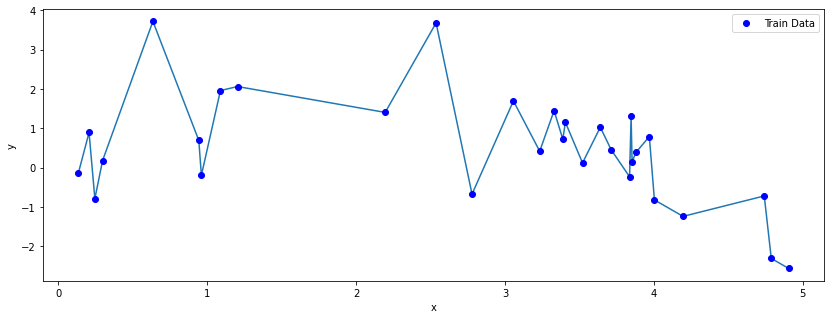

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.xlabel("x")
plt.ylabel("y")

#Set points onto plot
plt.plot(X_train, y_train)
plt.plot(X_train, y_train, 'o', color='blue', label='Train Data')

plt.legend(loc="best")
plt.show()

#### Linear regression model fitting

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

#Create Linear regression model and fit it with train data
regression = LinearRegression()
regression.fit(X_train, y_train)

#Predict results for test data
y_pred_lr = regression.predict(X_test)

#### Linear regression model prediction & Evaluation


In [5]:
from sklearn import metrics

def print_metrics(y_actual, y_pred):
  print('Mean absolute error:    ', str(metrics.mean_absolute_error(y_actual, y_pred)))
  print('Mean squared error:     ', str(metrics.mean_squared_error(y_actual, y_pred)))
  print('Root mean squared error:', str(metrics.mean_squared_error(y_actual, y_pred, squared=False)))
  print('Coef. of determination: ', str(metrics.r2_score(y_actual, y_pred)))

In [6]:
print_metrics(y_test, y_pred_lr)

Mean absolute error:     0.7837610302414408
Mean squared error:      0.78105677092199
Root mean squared error: 0.8837741628504365
Coef. of determination:  0.2609450135378707


#### Plotting original data and prediction


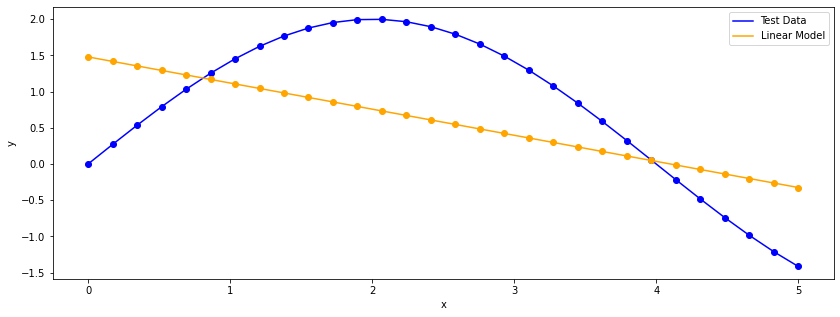

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))


plt.xlabel("x")
plt.ylabel("y")

#Plotting original data and prediction
plt.plot(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_test, 'o', color='blue')
plt.plot(X_test, y_pred_lr, color='orange', label='Linear Model')
plt.plot(X_test, y_pred_lr, 'o', color='orange')

plt.legend(loc="best")
plt.show()

#### Did the linear regression model give a good fit? Elaborate your answer

**Answer**: No, linear regression gave a bad fit. Linear regression model is underfitting. We can see on plot, that model should be more complex than linear.

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [9]:
#Constructing the polynomial regression pipeline via PolynomialFeatures and LinearRegression
pipeline = Pipeline([('polynomial_features', PolynomialFeatures()), ("linear_regression", LinearRegression())])

#### Tuning the degree hyper-parameter using GridSearch

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

#Set parameters for Grid Search. It's a degree number from 2 to 9
degrees = range(2, 10)
parameters = {'polynomial_features__degree' : degrees}

# Define Grid Search for our pipeline(Polynomial Regression model)
search = GridSearchCV(pipeline, parameters, cv=8, scoring='neg_mean_squared_error')

search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):"%search.cv, search.best_params_['polynomial_features__degree'])
print(-cross_val_score(pipeline, X_test, y_test, cv=8, scoring='neg_mean_squared_error').mean())

#Do prediction
y_pred_pn = search.predict(X_test)

Best parameter (CV score=8.000): 2
0.09127822801614137


In [11]:
print_metrics(y_pred_pn, y_test)

Mean absolute error:     0.15213273421671733
Mean squared error:      0.08205877217937993
Root mean squared error: 0.2864590235607528
Coef. of determination:  0.9433945592800026


#### Manually finding the best degree

In [12]:
for degree in degrees:
    #Define new pipeline with specific degree and fit the training data
    pipeline_i = Pipeline([('polynomial_features', PolynomialFeatures(degree=degree)), ("linear_regression", LinearRegression())])
    pipeline_i.fit(X_train, y_train)
    #Compute score and print it
    scores = cross_val_score(pipeline_i, X_train, y_train, cv=8, scoring='neg_mean_squared_error')
    print('Model with degree', degree, ':')
    print(-scores.mean(), '\t', scores.std())
    print()

Model with degree 2 :
1.0783084797230353 	 0.9556555717557558

Model with degree 3 :
1.8196891484835747 	 2.3420652079362636

Model with degree 4 :
6.219075633167948 	 10.822201532040795

Model with degree 5 :
14.781989176310345 	 33.072555383290634

Model with degree 6 :
90.48103273226462 	 155.14595046591984

Model with degree 7 :
316.9772567844489 	 666.4359795150942

Model with degree 8 :
521.2964513455299 	 908.2260185401677

Model with degree 9 :
4358.357654574604 	 7745.1546360635575



#### Plotting the test data and the best degree polynomial model

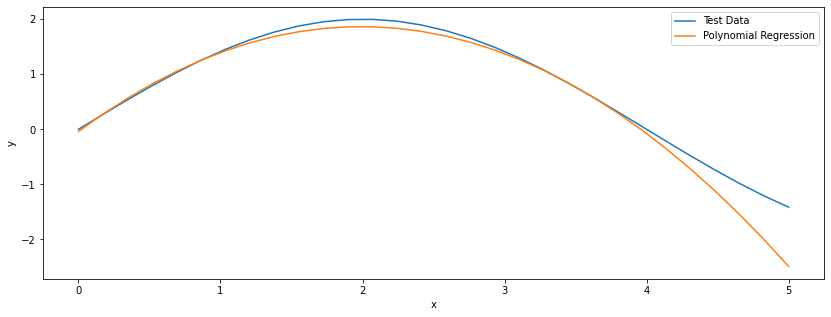

In [13]:
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label="Test Data")

plt.xlabel("x")
plt.ylabel("y")

plt.plot(X_test, y_pred_pn, label='Polynomial Regression')

plt.legend(loc="best")
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [14]:
import pandas as pd
#Loading the dataset
data = pd.read_csv('pokemon_modified.csv')

#### Remove the 2 redundant features

In [15]:
#'name' is unique feature for each row
#'classification' is categorical feature and consists of more than 500 values, so it will be hard for model to
#  take care for many "new" features
X = data.drop(['is_legendary', 'name', 'classification'], axis=1)

y = data['is_legendary']

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [16]:
from sklearn.model_selection import train_test_split
#Splitting the data on test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y, test_size=0.2)

Check if the dataset is balanced or not and comment on it

In [17]:
print('Regular rare:', data.drop(data[data.is_legendary == 1].index).shape[0], '\nLegendary:', data.drop(data[data.is_legendary == 0].index).shape[0])

Regular rare: 731 
Legendary: 70


Dataset is imbalanced. Only 8% of samples are legendary while others are not legendary.

#### Exploring the dataset and checking for missing values

In [18]:
print(X_test.head())
print(X_test.info())

     against_bug  against_dark  against_dragon  against_electric  \
574          2.0           2.0             1.0               1.0   
723          1.0           2.0             1.0               0.5   
655          1.0           1.0             1.0               2.0   
401          1.0           1.0             1.0               1.0   
690          0.5           1.0             2.0               0.5   

     against_fairy  against_fight  against_fire  against_flying  \
574            1.0            0.5           1.0             1.0   
723            1.0            0.0           2.0             2.0   
655            1.0            1.0           0.5             1.0   
401            1.0            0.5           2.0             2.0   
690            1.0            0.5           0.5             1.0   

     against_ghost  against_grass  ...  experience_growth  height_m  hp  \
574            2.0           1.00  ...            1059860       0.7  60   
723            2.0           0.50  ...

In [19]:
print(X_train.head())
print(X_train.info())

     against_bug  against_dark  against_dragon  against_electric  \
564          1.0           1.0             1.0               2.0   
493          1.0           2.0             1.0               1.0   
70           1.0           1.0             1.0               0.5   
240          1.0           1.0             1.0               1.0   
749          1.0           1.0             1.0               0.0   

     against_fairy  against_fight  against_fire  against_flying  \
564            1.0            2.0          0.25             0.5   
493            0.5            0.5          0.50             1.0   
70             0.5            0.5          2.00             2.0   
240            1.0            2.0          1.00             1.0   
749            1.0            1.0          1.00             1.0   

     against_ghost  against_grass  ...  experience_growth  height_m   hp  \
564            1.0           4.00  ...            1000000       1.2   74   
493            2.0           0.50  .

#### Impute the missing values

In [20]:
from sklearn.impute import SimpleImputer

#Columns with missed values
columns_miss_values = ['height_m', 'percentage_male', 'weight_kg']

#Define SimpleImputer with 'most_frequent' strategy for imputing the data
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)

SimpleImputer(strategy='most_frequent')

In [21]:
# Reset indexes of y's because Imputer will reset indexes of X's
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Perform imputer for X's data frames
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#### Double check that there are no missing values

In [22]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   against_bug        640 non-null    object
 1   against_dark       640 non-null    object
 2   against_dragon     640 non-null    object
 3   against_electric   640 non-null    object
 4   against_fairy      640 non-null    object
 5   against_fight      640 non-null    object
 6   against_fire       640 non-null    object
 7   against_flying     640 non-null    object
 8   against_ghost      640 non-null    object
 9   against_grass      640 non-null    object
 10  against_ground     640 non-null    object
 11  against_ice        640 non-null    object
 12  against_normal     640 non-null    object
 13  against_poison     640 non-null    object
 14  against_psychic    640 non-null    object
 15  against_rock       640 non-null    object
 16  against_steel      640 non-null    object
 1

#### Encode categorically

In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder()

X_train.type1

0         water
1       psychic
2         grass
3        normal
4        ground
         ...   
635        rock
636       water
637       grass
638         bug
639    electric
Name: type1, Length: 640, dtype: object

In [24]:
# Encode 'type1' feature and add it to the X's
new_data = encoder.fit_transform(np.array(X_train['type1']).reshape(-1, 1))
df1 = pd.DataFrame(new_data.toarray(), columns=encoder.categories_[0])

new_data = encoder.fit_transform(np.array(X_test['type1']).reshape(-1, 1))
df2 = pd.DataFrame(new_data.toarray(), columns=encoder.categories_[0])

In [25]:
X_train.drop('type1', axis=1, inplace=True)
X_train = pd.concat([X_train, df1], axis=1)

X_test.drop('type1', axis=1, inplace=True)
X_test = pd.concat([X_test, df2], axis=1)

#### Scale the data

In [26]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

#Scale the data by using MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Confusion Matrix

Are there highly co-related features in the dataset? Is it a problem?

**Answer:** Some of the features are pairwise high co-related, but we will not have problems with that. Basicaly, it will cause problems, because unnecessary features will increase complexity of model. But for our case it's just 4 pairs(out of 50 features)(with coef. >0.7) of co-related features, so we can just leave it.

<Axes: >

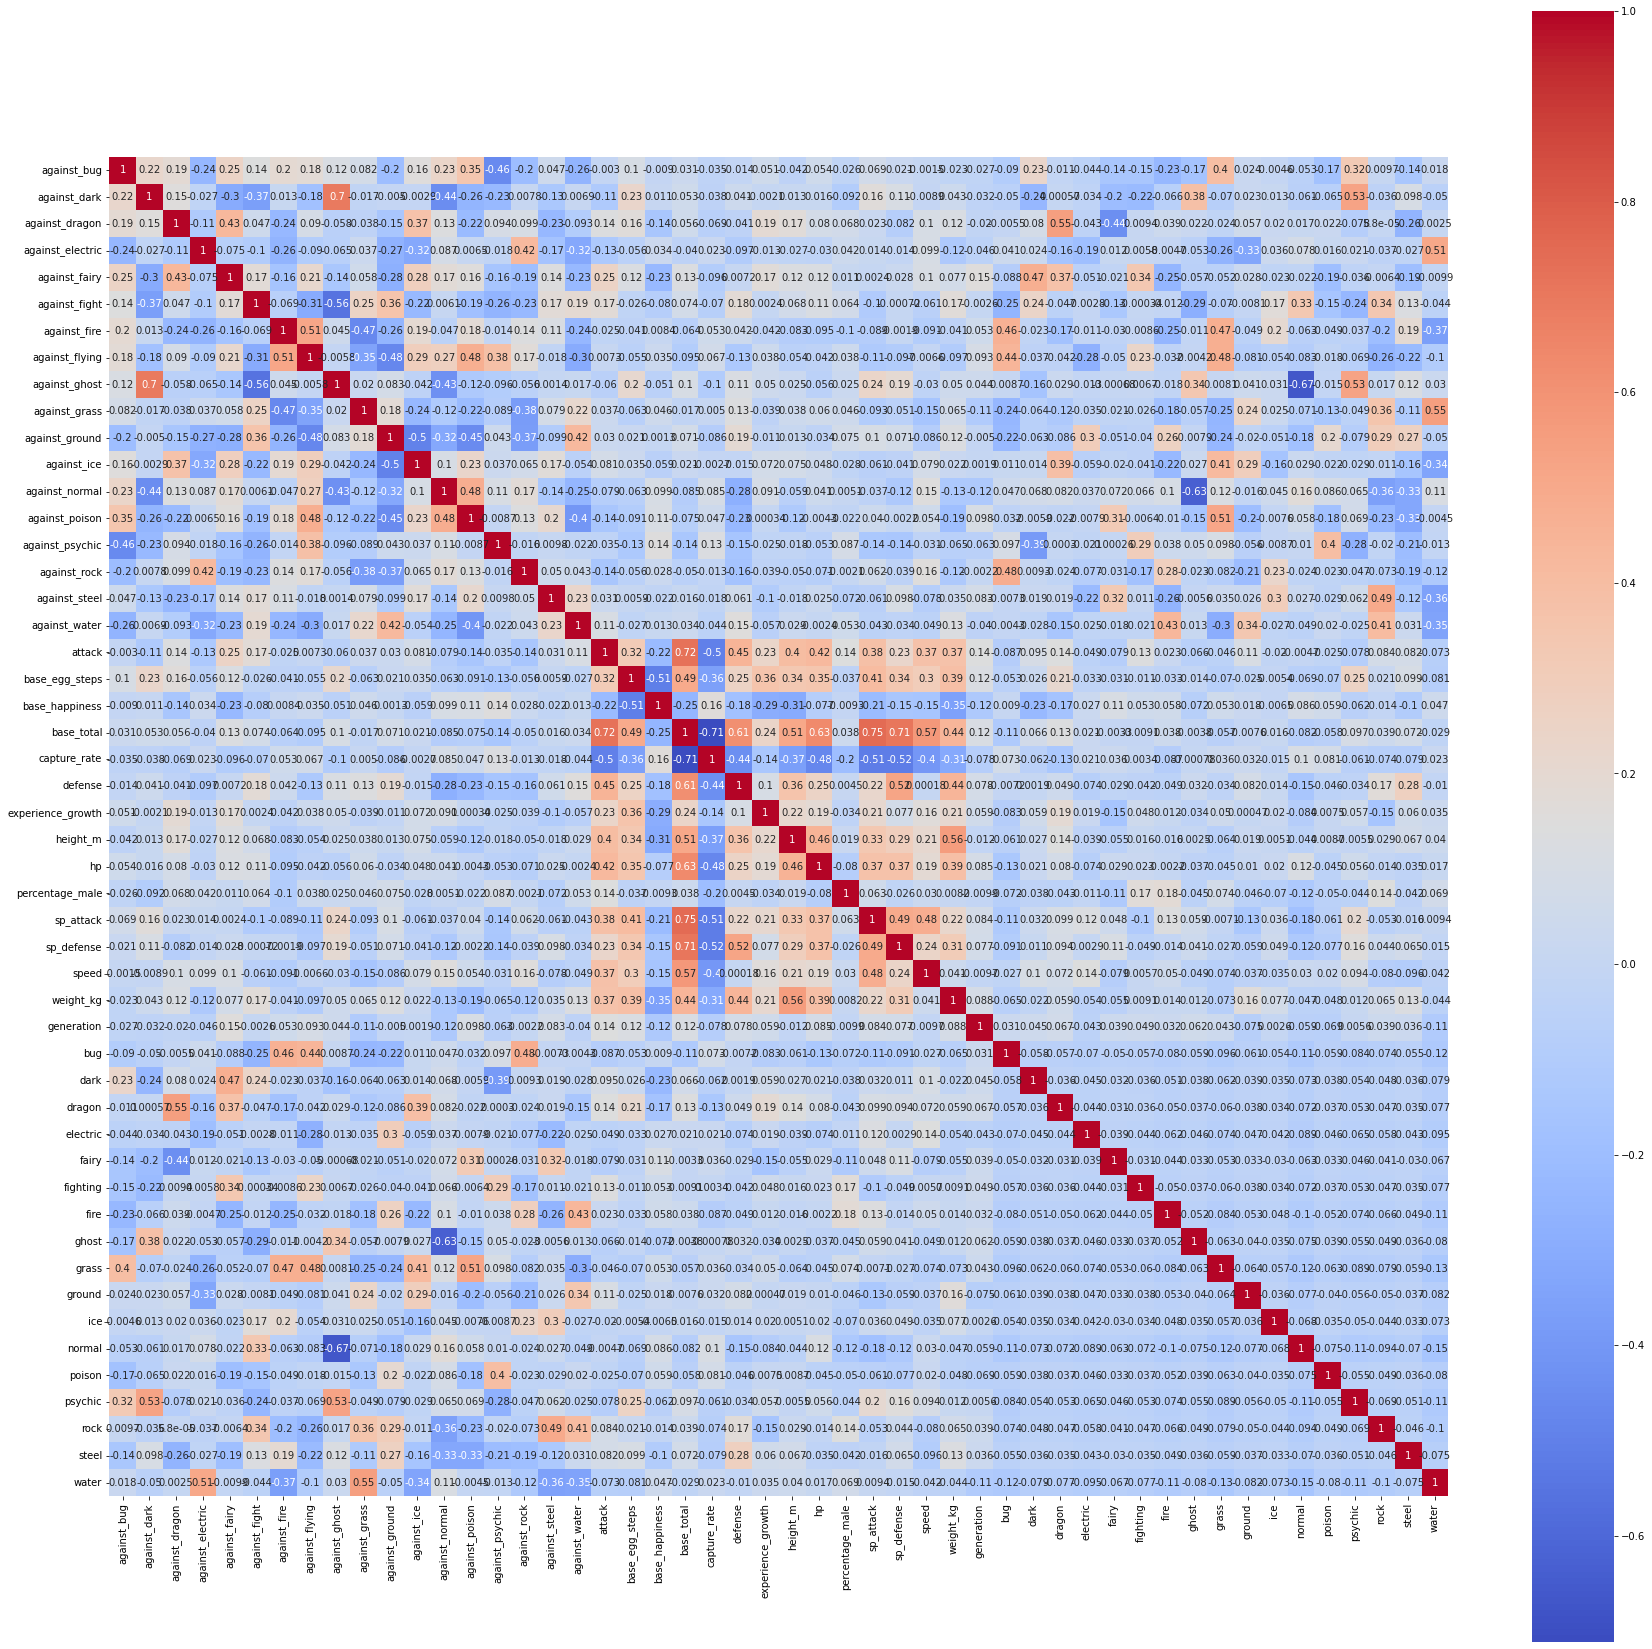

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

corr = X_train.corr()

# Show correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

Attemt to use PCA

In [28]:
# !!!
# I tried to reduce deminsion of data but it caused decreasing of metrics such as accuracy and f1-score.
# Therefore, I decided that I will not use PCA. 
# !!!

# from sklearn.decomposition import PCA

# new_d = 47
# pca = PCA(n_components=new_d)
# X_train = pca.fit_transform(X_train)

# X_test = pca.fit_transform(X_test)

### Model fitting and Comparison

#### Tuning LR model

In [29]:
# calculate and print metrics
def print_clf_metrics( y_actual, y_pred ):
  print(f'Testing accuracy  = {metrics.accuracy_score(y_actual, y_pred)}')
  print(f'Testing precision = {metrics.precision_score(y_actual, y_pred)}')
  print(f'Testing recall    = {metrics.recall_score(y_actual, y_pred)}')
  print(f'Testing F1-score  = {metrics.f1_score(y_actual, y_pred)}')

In [30]:
# Declare list of dicts. We need to separate some parameters from each other because some of them are not compatible
parameters = [{'penalty' : ['l2'],
               'C' : np.logspace(-3, 3, 7), 
               'solver' : ['newton-cg', 'lbfgs', 'liblinear']},
              {'penalty' : ['l1'], 
               'C' : np.logspace(-3, 3, 7), 
               'solver' : ['liblinear']}]

max_iter=1000 in LR constructor

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Define Grid Search for Logistic Regression with parameters from above
gs_clf = GridSearchCV(LogisticRegression(max_iter=1000), parameters)

In [32]:
gs_clf.fit(X_train, y_train)


GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1'], 'solver': ['liblinear']}])

In [33]:
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", gs_clf.best_score_)

Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9890625


#### Construct a LR with the best params and Evaluate the LR with the best params

In [34]:
# Take estimator with the best parameters
lr_clf = gs_clf.best_estimator_

In [35]:
y_pred = lr_clf.predict(X_test)

In [36]:
print_clf_metrics(y_test, y_pred)

Testing accuracy  = 0.9937888198757764
Testing precision = 0.9333333333333333
Testing recall    = 1.0
Testing F1-score  = 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [37]:
data_frame = pd.DataFrame({'Label':lr_clf.n_features_in_, 'Value' : lr_clf.coef_.reshape(-1, 1).reshape(50, )})
data_frame = data_frame.sort_values(by='Value', ascending=False, key=lambda x: abs(x))
print(data_frame.head(5))
print()
print(data_frame.tail(5))

    Label      Value
19     50  14.069685
22     50  -9.647303
44     50  -9.413216
24     50   8.927741
21     50   6.665520

    Label     Value
42     50 -0.171444
12     50 -0.136809
34     50 -0.133069
0      50 -0.112114
14     50 -0.075020


#### Tuning KNN model

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Parameters for GridSearch for KNN model
param_grid = {'n_neighbors' : list(range(1, 15)),
              'weights' : ['uniform', 'distance'],
              'metric' : ['euclidean', 'manhattan', 'chebyshev', 'cosine']}

# GridSearch for KNN model
grid_search_clf = GridSearchCV(KNeighborsClassifier(), param_grid)

# Fit data into GridSearch
grid_search_clf.fit(X_train, y_train)

print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.946875


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [39]:
# Take model with the best parameters
knn = grid_search_clf.best_estimator_
y_pred_knn = knn.predict(X_test)
print_clf_metrics(y_test, y_pred_knn)

Testing accuracy  = 0.9751552795031055
Testing precision = 1.0
Testing recall    = 0.7142857142857143
Testing F1-score  = 0.8333333333333333


#### Fitting GNB to the data and evaluating on the test dataset

In [40]:
from sklearn.naive_bayes import GaussianNB

# Declare GNB
gauss_nb = GaussianNB()

# Train it with training data
gauss_nb.fit(X_train, y_train)
# Predict for test data
y_pred = gauss_nb.predict(X_test)

print_clf_metrics(y_test, y_pred)

Testing accuracy  = 0.9316770186335404
Testing precision = 0.56
Testing recall    = 1.0
Testing F1-score  = 0.717948717948718


#### Which metric is most appropriate for this task and why?

**Asnwer:** F1-score is the most appropriate. Accuracy is bad because data is imbalanced. We need to have high recall and precision simultaneously. Therefore F1-score is the best.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? and based on what
did you pick it?

**Answer:** the best model for this task is Logistic Regression, because it has the best accuracy, recall and F1-score.

## Bonus Task

#### Loading the Dataset

In [41]:
import pandas as pd

#Read data
train_data = pd.read_csv('bonus_train.csv')

test_data = pd.read_csv('bonus_test.csv')

train_data.head()

,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0


In [42]:
#Splitting into X's and y's
X_train = train_data.drop(['target'], axis=1)
y_train = train_data['target']

X_test = test_data.drop(['target'], axis=1)
y_test = test_data['target']

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

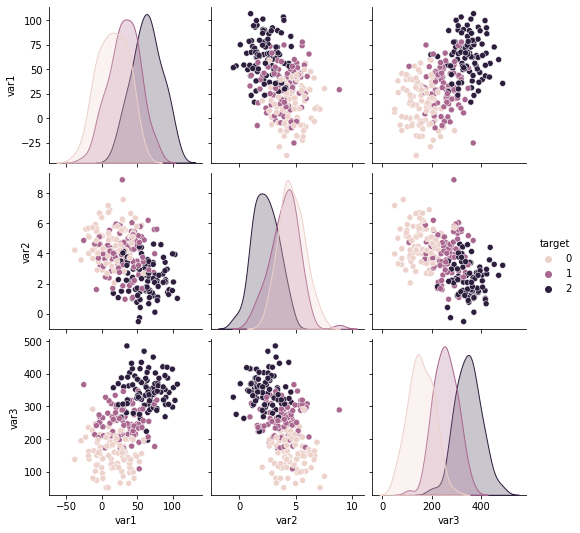

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot pairwise relationships in a dataset
sns.pairplot(train_data, hue='target', kind='scatter')

plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Define Logistic regression for multi class problem with one-vs-rest strategy
multi_lr = LogisticRegression(multi_class='ovr')
multi_lr.fit(X_train, y_train)

y_pred = multi_lr.predict(X_test)

In [45]:
print(metrics.accuracy_score(y_test, y_pred))

0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [46]:
# Define Logistic regression for multi class problem with multinomial strategy
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=500)
multi_lr.fit(X_train, y_train)

y_pred = multi_lr.predict(X_test)

In [47]:
print(metrics.accuracy_score(y_test, y_pred))

0.9


#### Using gridsearch to tune the C value and multi class

In [48]:
import numpy as np

# Define parameters for GridSearch
params = {'multi_class' : ['multinomial', 'ovr'],
          'C' : np.logspace(-10, 10, 7)}

In [49]:
from sklearn.model_selection import GridSearchCV

# Define GridSearch
grid_search_clf = GridSearchCV(LogisticRegression(max_iter=500), params)

# Fit it with train data
grid_search_clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500),
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['multinomial', 'ovr']})

In [50]:
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.825925925925926


In [51]:
print('Accuracy :', metrics.accuracy_score(y_test, grid_search_clf.predict(X_test)))

Accuracy : 0.8333333333333334


#### Comment on why one multi_class technique was better than the other

**Answer:** In OVR, we create N binary classification problems and presumptively treat them as independent from one another and the logistic regression problems. For our data, it could be untrue nevertheless. The entire distribution, as opposed to just a few, is created via a multinomial model.

#### Create LR with the best params

In [52]:
multi_lr = grid_search_clf.best_estimator_

#### Visualize the decision boundaries

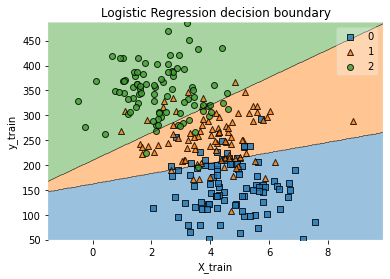

In [53]:
# Installing the newest version of plot_decision_regions and matplotlib
%pip install -q -U mlxtend
%pip install -q -U matplotlib

from mlxtend.plotting import plot_decision_regions

multi_lr = multi_lr.fit(X_train.drop(['var1'], axis=1).values, y_train.values)

plot_decision_regions(X_train.drop(['var1'], axis=1).values, y_train.values, multi_lr)

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?

**Answer:** model is good, because it correctly works with noisy data and high accuracy. Moreover, model isn't overfitting.